In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils import np_utils

from scipy.signal import spectrogram

import tensorflow as tf

In [2]:
dataframe = read_csv('/content/drive/MyDrive/UPJS_mgr/neuronove_siete/MindBigDataVisualMnist2021-Muse2v0.16Cut2.csv', engine='python')
dataset = dataframe.values
print(np.shape(dataset))

(11386, 6420)


figure =  6


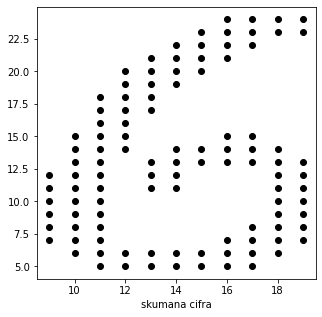

In [3]:
row_num = 17
dataset_row = dataset[row_num, 3:6420]

figure = dataset_row[0:784]
for i in range(len(figure)):
  if figure[i] > 0:
    figure[i] = 1

figure2 = np.reshape(figure, [28, 28], 'A')
print('figure = ', dataset[row_num, 2])

plt.figure(figsize = (5, 5))
for i in range(28):
  for j in range(28):
    if figure2[i, j] > 0:
      plt.plot(j, 27 - i, 'ko')

plt.xlabel('skumana cifra')
plt.savefig('cifra.png')
plt.show()

(array([1135, 1263, 1096, 1167, 1120, 1012, 1164, 1196, 1091, 1142]), array([0.0, 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9.0],
      dtype=object))


(array([1135., 1263., 1096., 1167., 1120., 1012., 1164., 1196., 1091.,
        1142.]), array([0.0, 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9.0],
       dtype=object), <a list of 10 Patch objects>)

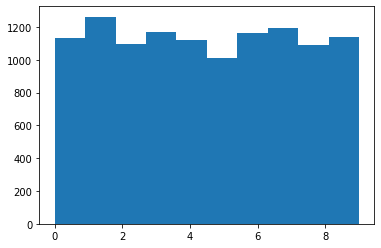

In [4]:
histo = np.histogram(dataset[:, 2])
print(histo)
plt.hist(dataset[:, 2])
# plt.savefig('histogram.png')

## data preparation for 28x28 figures

In [5]:
figures_data_x = dataset[:, 3:787]
print('figures data x ', figures_data_x.shape)

X_train = figures_data_x.reshape((figures_data_x.shape[0], 28, 28, 1)).astype('float32')
print('X_train ', X_train.shape)

# normalize from 0-255 to 0-1
X_train = X_train / 255

# pre kazdy obrazok, urobime vektor, napr.: 7 -> [0 0 0 0 0 0 0 1 0 0]
y_train = dataset[:, 2]
y_train = np_utils.to_categorical(y_train)
print('y_train ', y_train)

figures data x  (11386, 784)
X_train  (11386, 28, 28, 1)
y_train  [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


## model for 28x28 figures

In [ ]:
def figure_model():
  model = Sequential()
  model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

fig_model = figure_model()
fig_model.summary()
fig_model.fit(X_train, y_train, epochs=6, batch_size=20)

# evaluation of the model
scores = fig_model.evaluate(X_train, y_train, verbose=0)
print('CNN error: %.2f%%' % (100 - scores[1] * 100))
print('CNN accuracy: %.2f%%' % (100 - scores[0] * 100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [ ]:
figure_predict = fig_model.predict(X_train)
result_table = np.zeros((10, 3))

for j in range(10):
  result_table[j, 0] = j

for j in range(figures_data_x.shape[0]):
  xx = np.array(figure_predict[j][:])
  jfig = 0
  row_max = 0
  for i in range(10):
    if row_max <= xx[i]:
      jfig = i
      row_max = xx[i]
  prediction_fig = jfig
  real_fig = dataset[j, 2]

  if prediction_fig == real_fig:
    result_table[real_fig][1] = result_table[real_fig][1] + 1
  else:
    result_table[real_fig][2] = result_table[real_fig][2] + 1

aaa = result_table[:]
spr = np.sum(aaa, axis=0)

print('spravne ', spr[1])
print('nespravne', spr[2])

356/356 [==============================] - 2s 6ms/step
spravne  11350.0
nespravne 36.0


## summarize history for accuracy - model for 28x28 figures

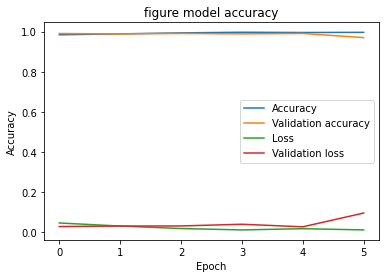

In [ ]:
hist = fig_model.fit(X_train, y_train, validation_split=0.33, epochs=6, batch_size=10, verbose=0)

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('figure model accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Accuracy', 'Validation accuracy', 'Loss', 'Validation loss'])
plt.savefig('figure_model_accuracy.png')
plt.show()

## summarize history for loss - model for 28x28 figures

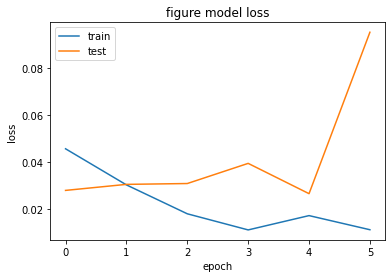

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('figure model loss')

plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'])
plt.show()

## EEG data preparation

EEG data  (11386, 1024)
EEG2 shape  (11386, 2, 512)


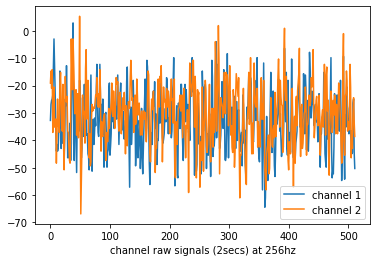

In [5]:
EEG_start = 788
EEG_length = 1024
EEG_data = dataset[:, EEG_start:EEG_start + EEG_length]

print('EEG data ', EEG_data.shape)

# 2 kanaly TP9 a TP10
EEG2 = EEG_data.reshape((EEG_data.shape[0], 2, 512)).astype('float32')

print('EEG2 shape ', EEG2.shape)

channel1 = EEG2[row_num, 0, :]
channel2 = EEG2[row_num, 1, :]

plt.plot(channel1)
plt.plot(channel2)
plt.legend(['channel 1', 'channel 2'], loc='lower right')
plt.xlabel('channel raw signals (2secs) at 256hz')
plt.savefig('signals.png')

## spectrograms 

outputs shape  (11386, 52, 22)


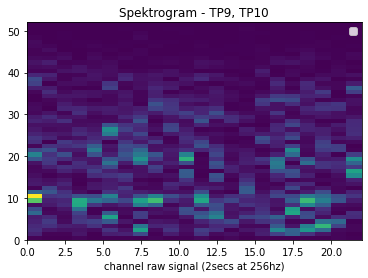

In [6]:
EEG_rows_count = EEG_data.shape[0]

bb = np.zeros((2, 512))
outputs_i = np.zeros((2, 52, 11))
outputs = np.zeros((EEG_rows_count, 52, 22))

fs = 256

for row in range(EEG_rows_count):
  for i in range(2):
    bb[i, :] = EEG2[row, i, :]
    ff, tt, outputs_i[i, :, :] = spectrogram(bb[i, :], fs, nperseg=51, noverlap=5, nfft=102)
  
  outputs[row, 0:52, 0:11] = outputs_i[0, :, :]
  outputs[row, 0:52, 11:22] = outputs_i[1, :, :]


# print('outputs', outputs[row_num, :, :])

print('outputs shape ', outputs.shape)

aFig = plt.pcolormesh(outputs[row_num, :, :])
plt.title('Spektrogram - TP9, TP10')
plt.legend(['TP9', 'TP10'])
plt.xlabel('channel raw signal (2secs at 256hz)')
plt.savefig('spektrogram.png')
plt.show()

In [7]:
EEG4 = outputs
X_train = EEG4.reshape((EEG4.shape[0], 52, 22, 1)).astype('float')
print('X_train ', X_train.shape)

y_train = dataset[:, 2]
# pre kazdy obrazok, urobime vektor, napr.: 7 -> [0 0 0 0 0 0 0 1 0 0]
y_train = np_utils.to_categorical(y_train)
print('y_train ', y_train)

X_train  (11386, 52, 22, 1)
y_train  [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
num_classes = len(y_train[0][:])
print('num_classes ', num_classes)

# CNN model
def baseline_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=(52, 22, 1), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

num_classes  10


In [ ]:
model = baseline_model()
model.summary()
model.fit(X_train, y_train, epochs=10, batch_size=10)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 20, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 10, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 25, 10, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 8000)              0         
                                                                 
 dense_7 (Dense)             (None, 32)                256032    
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                      

CNN error 88.99%
CNN accuracy -130.61%
356/356 [==============================] - 3s 7ms/step
Predikcia pre cifru v riadku  17
[0.09837873 0.10961498 0.09731647 0.1020267  0.09939345 0.08879004
 0.10252784 0.10658473 0.09518518 0.10018205]
max =  0.109614976
Prediction figure  1
Real figure  6


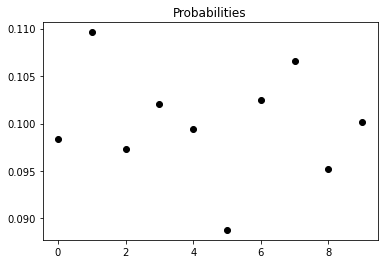

In [ ]:
scores = model.evaluate(X_train, y_train, verbose=0)
print('CNN error %.2f%%' % (100 - scores[1] * 100))
print('CNN accuracy %.2f%%' % (100 - scores[0] * 100))

figure_predict = model.predict(X_train)
print('Predikcia pre cifru v riadku ', row_num)
print(figure_predict[row_num][:])

# predikcia pre cifru v riadku row_num
xx = np.array(figure_predict[row_num][:])
row_max = xx[0]
jfig = 0

for i in range(10):
  if row_max <= xx[i]:
    jfig = i
    row_max = xx[i]

print('max = ', row_max)
print('Prediction figure ', jfig)
print('Real figure ', dataset[row_num, 2])

plt.plot(figure_predict[row_num][:], 'ko')
plt.title('Probabilities')
plt.show()

In [ ]:
result_table = np.zeros((10, 3))

for j in range(10):
  result_table[j, 0] = j

for j in range(EEG_rows_count):
  xx = np.array(figure_predict[j][:])
  jfig = 0
  row_max = 0
  for i in range(10):
    if row_max <= xx[i]:
      jfig = i
      row_max = xx[i]
  prediction_fig = jfig
  real_fig = dataset[j, 2]

  if prediction_fig == real_fig:
    result_table[real_fig][1] = result_table[real_fig][1] + 1
  else:
    result_table[real_fig][2] = result_table[real_fig][2] + 1

aaa = result_table[:]
spr = np.sum(aaa, axis=0)

print('spravne ', spr[1])
print('nespravne', spr[2])

spravne  1254.0
nespravne 10132.0


## summarize history for accuracy

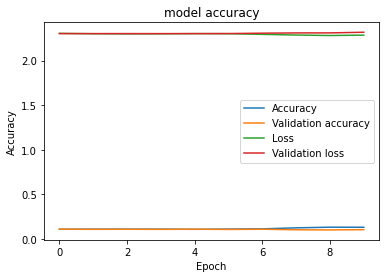

In [ ]:
hist = model.fit(X_train, y_train, validation_split=0.33, epochs=10, batch_size=10, verbose=0)

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation accuracy', 'Loss', 'Validation loss'])
plt.show()


## summarize history for loss

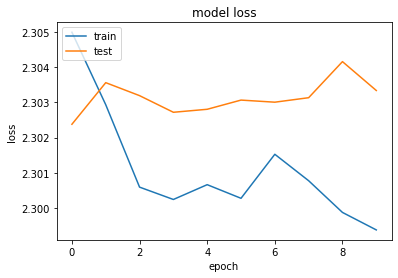

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
def resnet_model():
  res_model = Sequential()

  pretrained_model = tf.keras.applications.ResNet50(
      include_top=False,
      weights='imagenet',
      pooling='max',
      input_shape=(52, 22, 3)
  )


  for layer in pretrained_model.layers:
    layer.trainable = False

  res_model.add(pretrained_model)
  res_model.add(Flatten())
  res_model.add(Dense(128, activation='relu'))
  res_model.add(Dense(10, activation='softmax'))

  res_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return res_model

In [13]:
X_train = np.stack((outputs,)*3, axis=-1)
print(X_train.shape)

X_train_new = []


# canvas = np.zeros((64, 64, 3)).astype('float')

# print('canvas', canvas[6:58, 21:43])

# for i in range(X_train.shape[0]):
#   canvas[6:58, 21:43] = X_train[i]
#   X_train_new.append(canvas)

# print(np.shape(X_train_new))
# print(X_train_new[0])

EEG_res_model = resnet_model()

EEG_res_model.summary()
EEG_res_model.fit(X_train, y_train, epochs=4, batch_size=10)


(11386, 52, 22, 3)


ValueError: ignored